# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load downs FBM raw dataset

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/downs_bm/data/downs_raw_dr_20200311.h5ad')

In [5]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD8 T cell                  55
CD14 monocyte              252
CD56 bright NK              36
CMP                         37
DC1                         16
DC2                         94
DC3                         98
HSC                         45
ILC precursor               13
MEMP                        42
MK                          25
MSC                         18
Treg                         8
chondrocyte                  4
early B                     23
early MK                     7
early erythroid            766
endothelium                 37
eo/baso/mast precursor      40
eosinophil                  41
late erythroid            3341
macrophage                  64
mast cell                   27
mature B                    20
mature NK                   69
mid erythroid             2082
monocyte precursor         172
myelocyte                  218
neut-myeloid prog.          27
neutrophil                 245
neutrophil precursor       

# Add broad annotation as metadata and accompanying colours

In [7]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/downs_broad_annots.csv")

In [8]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['CAR',
 'CD14 monocyte',
 'CD56 bright NK',
 'CD8 T cell',
 'CMP',
 'DC1',
 'DC2',
 'DC3',
 'HSC',
 'ILC precursor',
 'MEMP',
 'MK',
 'MSC',
 'Treg ',
 'chondrocyte ',
 'early B',
 'early MK',
 'early erythroid',
 'endothelium',
 'eo/baso/mast precursor',
 'eosinophil',
 'late erythroid',
 'macrophage',
 'mast cell ',
 'mature B',
 'mature NK',
 'mid erythroid',
 'monocyte precursor',
 'myelocyte',
 'neut-myeloid prog.',
 'neutrophil',
 'neutrophil precursor',
 'osteoblast',
 'osteoclast',
 'pDC',
 'pre B cell',
 'pre monocyte',
 'pre pDC',
 'promyelocyte',
 'transitional NK cell']

In [9]:
broad_annot = annot["broad_cell.labels"].tolist()
broad_annot

['stroma',
 'monocyte',
 'T/NK',
 'T/NK',
 'HSC/MPP',
 'DC',
 'DC',
 'DC',
 'HSC/MPP',
 'T/NK',
 'HSC/MPP',
 'MK',
 'stroma',
 'T/NK',
 'stroma',
 'B_lineage',
 'MK',
 'erythroid',
 'stroma',
 'HSC/MPP',
 'eo/baso/mast',
 'erythroid',
 'stroma',
 'eo/baso/mast',
 'B_lineage',
 'T/NK',
 'erythroid',
 'monocyte',
 'neutrophil',
 'HSC/MPP',
 'neutrophil',
 'HSC/MPP',
 'stroma',
 'stroma',
 'DC',
 'B_lineage',
 'monocyte',
 'DC',
 'neutrophil',
 'T/NK']

In [10]:
adata.obs["broad_fig6_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [11]:
adata.obs["broad_fig6_cell.labels"] = adata.obs["broad_fig6_cell.labels"].astype('category')
adata.obs["broad_fig6_cell.labels"].cat.categories

Index(['B_lineage', 'DC', 'HSC/MPP', 'MK', 'T/NK', 'eo/baso/mast', 'erythroid', 'monocyte', 'neutrophil', 'stroma'], dtype='object')

In [12]:
adata.obs["broad_fig6_cell.labels"] = adata.obs["broad_fig6_cell.labels"].cat.reorder_categories(['HSC/MPP', 
            'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'])

In [13]:
adata.obs["broad_fig6_cell.labels"] = adata.obs["broad_fig6_cell.labels"].astype('category')
adata.obs["broad_fig6_cell.labels"].cat.categories

Index(['HSC/MPP', 'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'], dtype='object')

In [14]:
adata.obs["broad_fig6_cell.labels"].cat.categories[2]

'MK'

In [15]:
new_colors = np.empty(len(adata.obs["broad_fig6_cell.labels"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#f59771' # erythroid
new_colors[[2]] = '#8e88a8' # MK
new_colors[[3]] = '#d1db94' # B lineage
new_colors[[4]] = '#4d78bc' # DC
new_colors[[5]] = '#a9479a' # eo/baso/mast
new_colors[[6]] = '#f3c3db' # neutrophil
new_colors[[7]] = '#86b3e0' # monocyte
new_colors[[8]] = '#d43d6a' # TNK
new_colors[[9]] = '#48b9b4' # stroma

adata.uns["broad_fig6_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f59771', '#8e88a8', '#d1db94', '#4d78bc', '#a9479a',
       '#f3c3db', '#86b3e0', '#d43d6a', '#48b9b4'], dtype=object)

In [16]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD8 T cell                  55
CD14 monocyte              252
CD56 bright NK              36
CMP                         37
DC1                         16
DC2                         94
DC3                         98
HSC                         45
ILC precursor               13
MEMP                        42
MK                          25
MSC                         18
Treg                         8
chondrocyte                  4
early B                     23
early MK                     7
early erythroid            766
endothelium                 37
eo/baso/mast precursor      40
eosinophil                  41
late erythroid            3341
macrophage                  64
mast cell                   27
mature B                    20
mature NK                   69
mid erythroid             2082
monocyte precursor         172
myelocyte                  218
neut-myeloid prog.          27
neutrophil                 245
neutrophil precursor       

In [17]:
cell_numbers = adata.obs.groupby(["broad_fig6_cell.labels"]).apply(len)
cell_numbers

broad_fig6_cell.labels
HSC/MPP          231
erythroid       6189
MK                32
B_lineage        102
DC               262
eo/baso/mast      68
neutrophil       820
monocyte         571
T/NK             192
stroma           155
dtype: int64

# Pre-process the total dataset

In [18]:
# normalise count data 
sc.pp.normalize_total(adata)

In [19]:
# log the count data 
sc.pp.log1p(adata)

In [20]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [21]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [22]:
# run pca
sc.tl.pca(adata, n_comps=50)

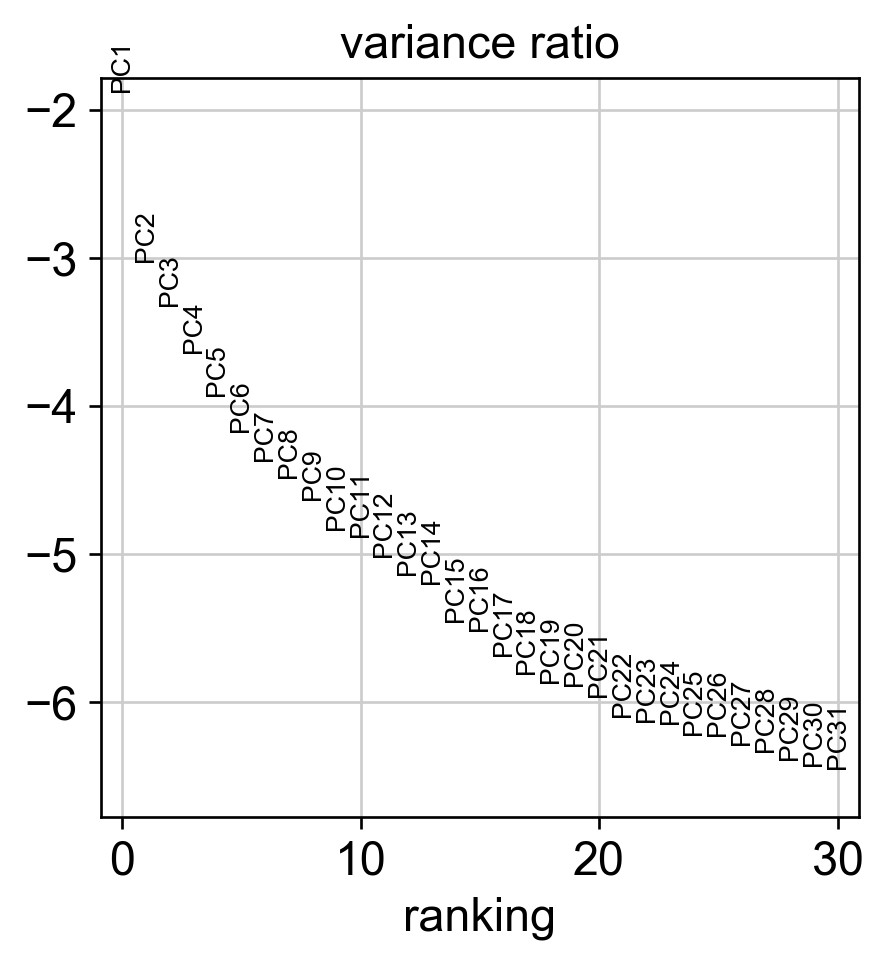

In [23]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [24]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=30) 

In [25]:
# run umap
sc.tl.umap(adata) 

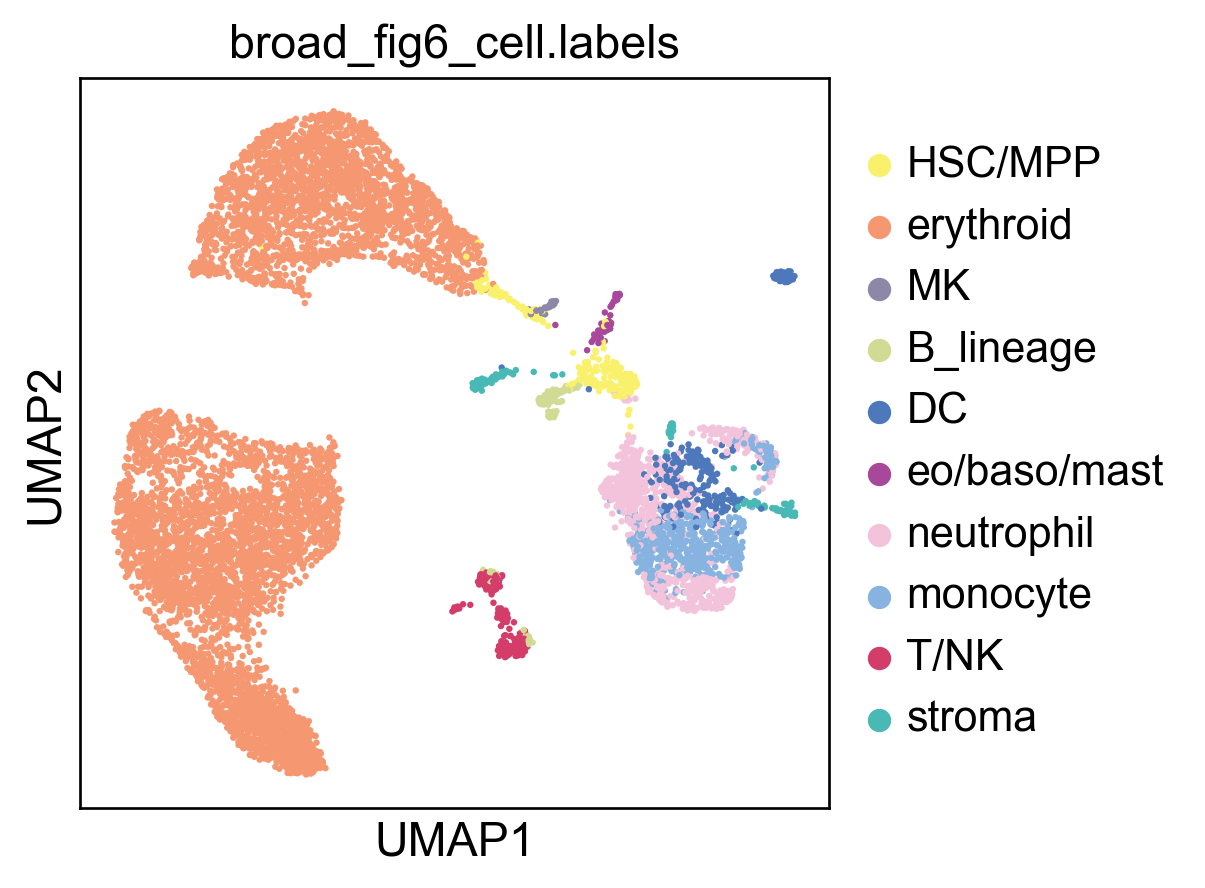

In [26]:
sc.pl.umap(adata, color=['broad_fig6_cell.labels'], size=15) 

In [27]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_pre-harmony_20200602_labels_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_pre-harmony_20200602_labels_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig6_cell.labels', save='_downs_fbm_pre-harmony_20200602_labels_broad_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='broad_fig6_cell.labels', save='_downs_fbm_pre-harmony_20200602_labels_broad_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_pre-harmony_20200602_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_pre-harmony_20200602_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_pre-harmony_20200602_sample_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_pre-harmony_20200602_sample_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

# Run harmony batch correction

In [28]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [29]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [30]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

In [31]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add UMAP 

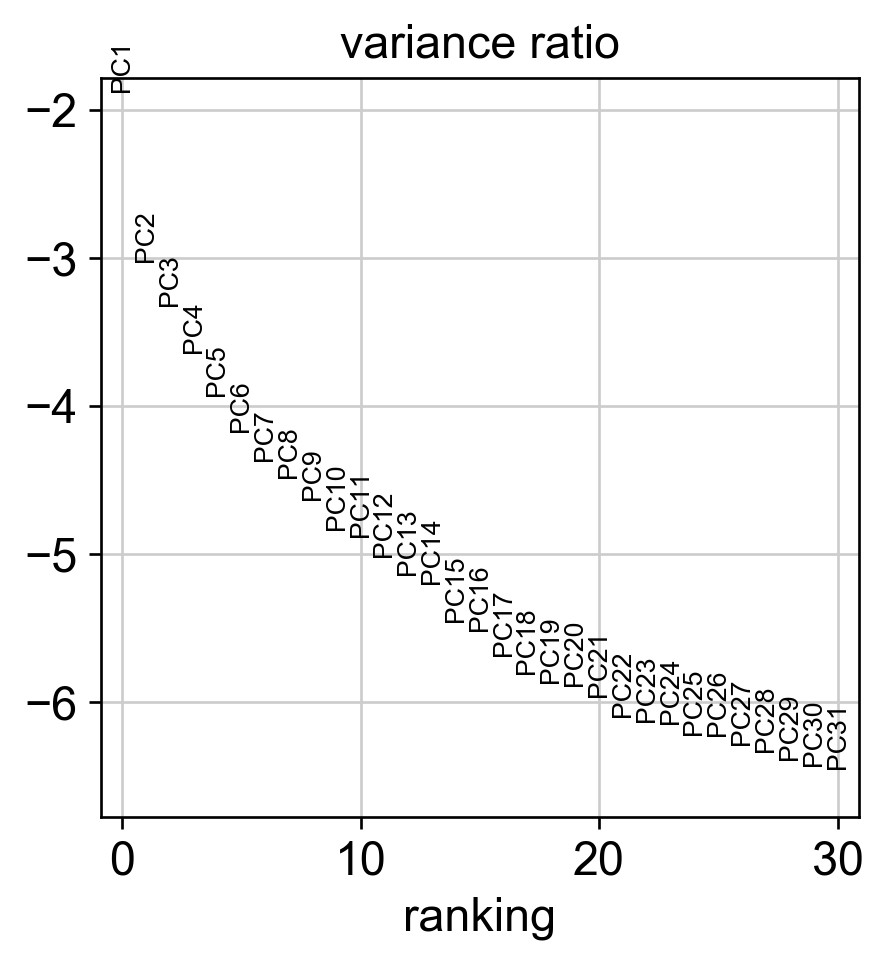

In [32]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [33]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=20) 

In [34]:
# run umap
sc.tl.umap(adata) 

# Plot UMAP

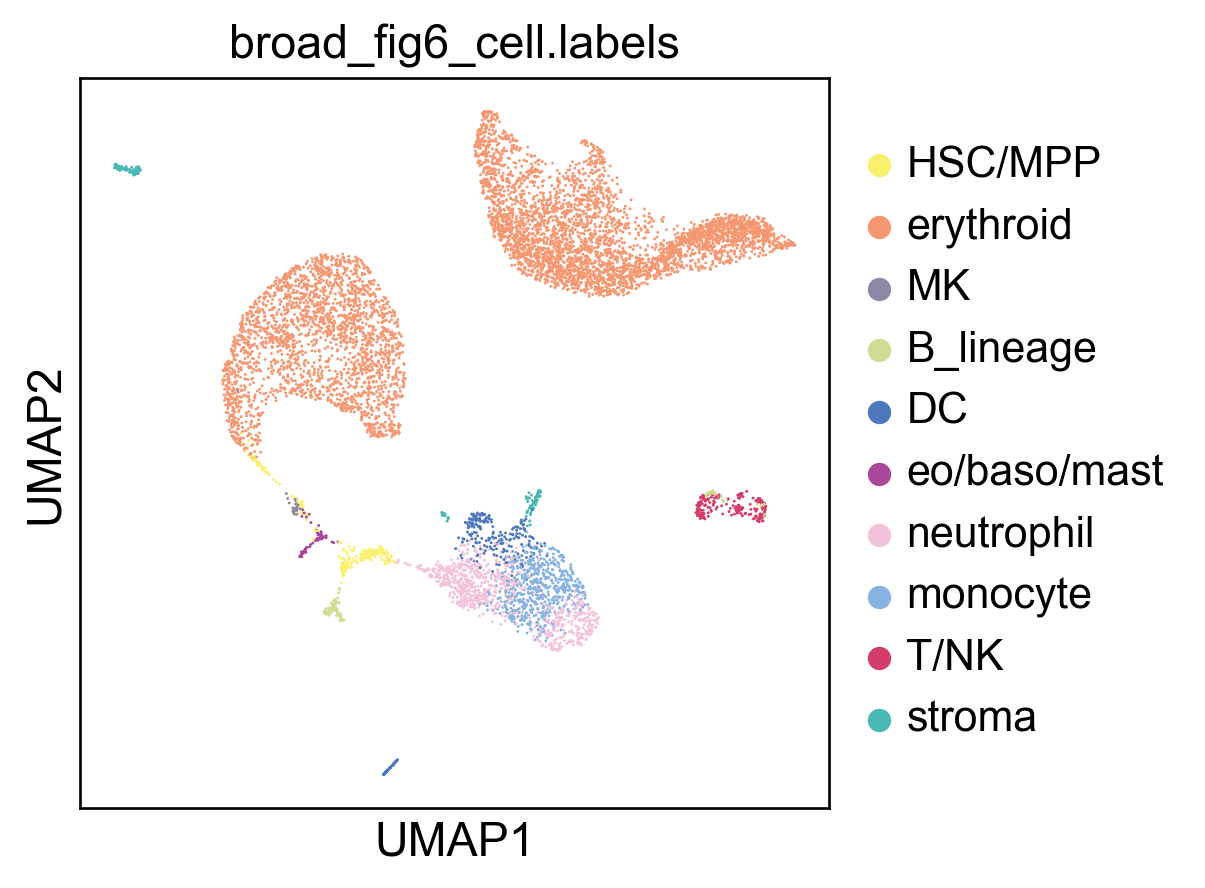

In [35]:
sc.pl.umap(adata, color=['broad_fig6_cell.labels'], size=3)

In [42]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_post-harmony_20200602_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_downs_fbm_post-harmony_20200602_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig6_cell.labels', save='_downs_fbm_post-harmony_20200602_labels_broad_legoff.pdf', show=False, size=5) 
sc.pl.umap(adata, color='broad_fig6_cell.labels', save='_downs_fbm_post-harmony_20200602_labels_broad_legon.pdf', show=False, size=5, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_post-harmony_20200602_seqtype_legoff.pdf', show=False, size=15) 
sc.pl.umap(adata, color='sequencing.type', save='_downs_fbm_post-harmony_20200602_seqtype_legon.pdf', show=False, size=15, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_post-harmony_20200602_sample_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='orig.ident', save='_downs_fbm_post-harmony_20200602_sample_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

# Save the data

In [37]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [38]:
adata.X

<8622x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 16760477 stored elements in Compressed Sparse Row format>

In [39]:
adata.raw.X

<8622x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 18210192 stored elements in Compressed Sparse Row format>

In [40]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig6a_downs_fbm_scaled_gex_updated_dr_20200602.h5ad")

In [41]:
adata.shape

(8622, 33694)

# Save the metadata

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig6a_downs_fbm_scaled_gex_updated_dr_20200602.h5ad")

In [5]:
pd.DataFrame(adata.obs).to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/downs_meta_20200618.csv")

# Update broad annotations (due to 20200713 annot update) and replot UMAP

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load downs processed dataset and update annotations

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig6a_downs_fbm_scaled_gex_updated_dr_20200602.h5ad")

In [5]:
tot_adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/downs_bm/data/downs_raw_dr_20200714.h5ad")

In [6]:
tot_adata

AnnData object with n_obs × n_vars = 8622 × 33694 
    obs: 'lanes', 'mad_prd', 'auto_prd', 'cell.labels', 'orig.ident', 'sequencing.type', 'age', 'percent.mito', 'cell.labels_20200713'
    var: 'gene_ids'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [7]:
new_annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/S_Table_21_downs_meta_20200713.csv", index_col=0)
adata.obs["cell.labels"] = new_annot
adata.obs["cell.labels_20200713"] = tot_adata.obs["cell.labels_20200713"]
del adata.obs["broad_fig6_cell.labels"]

In [8]:
adata.obs

,lanes,mad_prd,auto_prd,cell.labels,orig.ident,sequencing.type,age,percent.mito,cell.labels_20200713
index,,,,,,,,,
AAACCTGAGTACGTTC-1-DSOX4,DSOX4,False,False,early erythroid,ICH12740,5GEX,13PCW,0.048956,early erythroid
AAACCTGCAAGCGATG-1-DSOX4,DSOX4,False,False,late erythroid,ICH12740,5GEX,13PCW,0.023771,late erythroid
AAACGGGCACCGAAAG-1-DSOX4,DSOX4,False,False,promonocyte,ICH12740,5GEX,13PCW,0.058779,monocyte precursor
AAACGGGGTTATGCGT-1-DSOX4,DSOX4,False,False,late erythroid,ICH12740,5GEX,13PCW,0.011670,late erythroid
AAAGATGGTAGCACGA-1-DSOX4,DSOX4,False,False,pre B cell,ICH12740,5GEX,13PCW,0.044516,pre B cell
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCCAAGTT-1-DSOX19_2,DSOX19_2,False,False,late erythroid,ICH14486,5GEX,12PCW,0.022784,late erythroid
TTTGTCAGTCCTGCTT-1-DSOX19_2,DSOX19_2,False,False,promonocyte,ICH14486,5GEX,12PCW,0.039085,monocyte precursor
TTTGTCAGTTAAGTAG-1-DSOX19_2,DSOX19_2,False,False,late erythroid,ICH14486,5GEX,12PCW,0.022529,late erythroid


In [9]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD14 monocyte              252
CD56 bright NK              36
CD8 T cell                  55
CMP                         37
DC1                         16
DC2                         94
DC3                         98
HSC                         45
ILC precursor               13
MEMP                        42
MK                          25
MOP                        350
MSC                         18
Treg                         8
chondrocyte                  4
early B cell                23
early MK                     7
early erythroid            766
endothelium                 37
eo/baso/mast precursor      40
eosinophil                  41
late erythroid            3341
macrophage                  64
mast cell                   27
mature B cell               20
mature NK                   69
mid erythroid             2082
myelocyte                  218
neutrophil                 245
osteoblast                  11
osteoclast                 

# Add broad annotation as metadata and accompanying colours

In [10]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/key_downs_broad_annots_20200714.csv")

In [11]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['CAR',
 'CD14 monocyte',
 'CD56 bright NK',
 'CD8 T cell',
 'chondrocyte',
 'CMP',
 'DC1',
 'DC2',
 'DC3',
 'early B cell',
 'early erythroid',
 'early MK',
 'endothelium',
 'eo/baso/mast precursor',
 'eosinophil',
 'HSC',
 'ILC precursor',
 'late erythroid',
 'macrophage',
 'mast cell',
 'mature B cell',
 'mature NK',
 'MEMP',
 'mid erythroid',
 'MK',
 'promonocyte',
 'MSC',
 'myelocyte',
 'promyelocyte',
 'neutrophil',
 'promyelocyte',
 'osteoblast',
 'osteoclast',
 'pDC',
 'pre B cell',
 'promonocyte',
 'pre pDC',
 'MOP',
 'transitional NK cell',
 'Treg']

In [12]:
broad_annot = annot["broad_fig5_umap_cell.labels"].tolist()
broad_annot

['stroma',
 'monocyte',
 'T/NK',
 'T/NK',
 'stroma',
 'HSC/MPP',
 'DC',
 'DC',
 'DC',
 'B_lineage',
 'erythroid',
 'MK',
 'stroma',
 'HSC/MPP',
 'eo/baso/mast',
 'HSC/MPP',
 'T/NK',
 'erythroid',
 'stroma',
 'eo/baso/mast',
 'B_lineage',
 'T/NK',
 'HSC/MPP',
 'erythroid',
 'MK',
 'monocyte',
 'stroma',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'stroma',
 'stroma',
 'DC',
 'B_lineage',
 'monocyte',
 'DC',
 'monocyte',
 'T/NK',
 'T/NK']

In [13]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].astype('category')
adata.obs["cell.labels"].cat.categories

Index(['CAR', 'CD14 monocyte', 'CD56 bright NK', 'CD8 T cell', 'CMP', 'DC1', 'DC2', 'DC3', 'HSC', 'ILC precursor', 'MEMP', 'MK', 'MOP', 'MSC', 'Treg', 'chondrocyte', 'early B cell', 'early MK', 'early erythroid', 'endothelium', 'eo/baso/mast precursor', 'eosinophil', 'late erythroid', 'macrophage', 'mast cell', 'mature B cell', 'mature NK', 'mid erythroid', 'myelocyte', 'neutrophil', 'osteoblast', 'osteoclast', 'pDC', 'pre B cell', 'pre pDC', 'promonocyte', 'promyelocyte', 'transitional NK cell'], dtype='object')

In [14]:
adata.obs["broad_fig5_umap_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [15]:
adata.obs["broad_fig5_umap_cell.labels"] = adata.obs["broad_fig5_umap_cell.labels"].astype('category')
adata.obs["broad_fig5_umap_cell.labels"].cat.categories

Index(['B_lineage', 'DC', 'HSC/MPP', 'MK', 'T/NK', 'eo/baso/mast', 'erythroid', 'monocyte', 'neutrophil', 'stroma'], dtype='object')

# Replot UMAP

In [16]:
adata.obs["broad_fig5_umap_cell.labels"] = adata.obs["broad_fig5_umap_cell.labels"].cat.reorder_categories(['HSC/MPP', 
            'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'])

In [17]:
adata.obs["broad_fig5_umap_cell.labels"] = adata.obs["broad_fig5_umap_cell.labels"].astype('category')
adata.obs["broad_fig5_umap_cell.labels"].cat.categories

Index(['HSC/MPP', 'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T/NK', 'stroma'], dtype='object')

In [18]:
adata.obs["broad_fig5_umap_cell.labels"].cat.categories[2]

'MK'

In [19]:
new_colors = np.empty(len(adata.obs["broad_fig5_umap_cell.labels"].cat.categories), dtype=object) 

new_colors[[0]] = '#f9f06c' # HSC/MPP
new_colors[[1]] = '#f59771' # erythroid
new_colors[[2]] = '#8e88a8' # MK
new_colors[[3]] = '#d1db94' # B lineage
new_colors[[4]] = '#4d78bc' # DC
new_colors[[5]] = '#a9479a' # eo/baso/mast
new_colors[[6]] = '#f3c3db' # neutrophil
new_colors[[7]] = '#86b3e0' # monocyte
new_colors[[8]] = '#d43d6a' # TNK
new_colors[[9]] = '#48b9b4' # stroma

adata.uns["broad_fig5_umap_cell.labels_colors"] = new_colors

new_colors

array(['#f9f06c', '#f59771', '#8e88a8', '#d1db94', '#4d78bc', '#a9479a',
       '#f3c3db', '#86b3e0', '#d43d6a', '#48b9b4'], dtype=object)

In [20]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD14 monocyte              252
CD56 bright NK              36
CD8 T cell                  55
CMP                         37
DC1                         16
DC2                         94
DC3                         98
HSC                         45
ILC precursor               13
MEMP                        42
MK                          25
MOP                        350
MSC                         18
Treg                         8
chondrocyte                  4
early B cell                23
early MK                     7
early erythroid            766
endothelium                 37
eo/baso/mast precursor      40
eosinophil                  41
late erythroid            3341
macrophage                  64
mast cell                   27
mature B cell               20
mature NK                   69
mid erythroid             2082
myelocyte                  218
neutrophil                 245
osteoblast                  11
osteoclast                 

In [21]:
cell_numbers = adata.obs.groupby(["broad_fig5_umap_cell.labels"]).apply(len)
cell_numbers

broad_fig5_umap_cell.labels
HSC/MPP          164
erythroid       6189
MK                32
B_lineage        102
DC               262
eo/baso/mast      68
neutrophil       535
monocyte         923
T/NK             192
stroma           155
dtype: int64

In [22]:
cell_numbers = adata.obs.groupby(["cell.labels", "broad_fig5_umap_cell.labels"]).apply(len)
cell_numbers

cell.labels             broad_fig5_umap_cell.labels
CAR                     stroma                            4
CD14 monocyte           monocyte                        252
CD56 bright NK          T/NK                             36
CD8 T cell              T/NK                             55
CMP                     HSC/MPP                          37
DC1                     DC                               16
DC2                     DC                               94
DC3                     DC                               98
HSC                     HSC/MPP                          45
ILC precursor           T/NK                             13
MEMP                    HSC/MPP                          42
MK                      MK                               25
MOP                     monocyte                        350
MSC                     stroma                           18
Treg                    T/NK                              8
chondrocyte             stroma                  

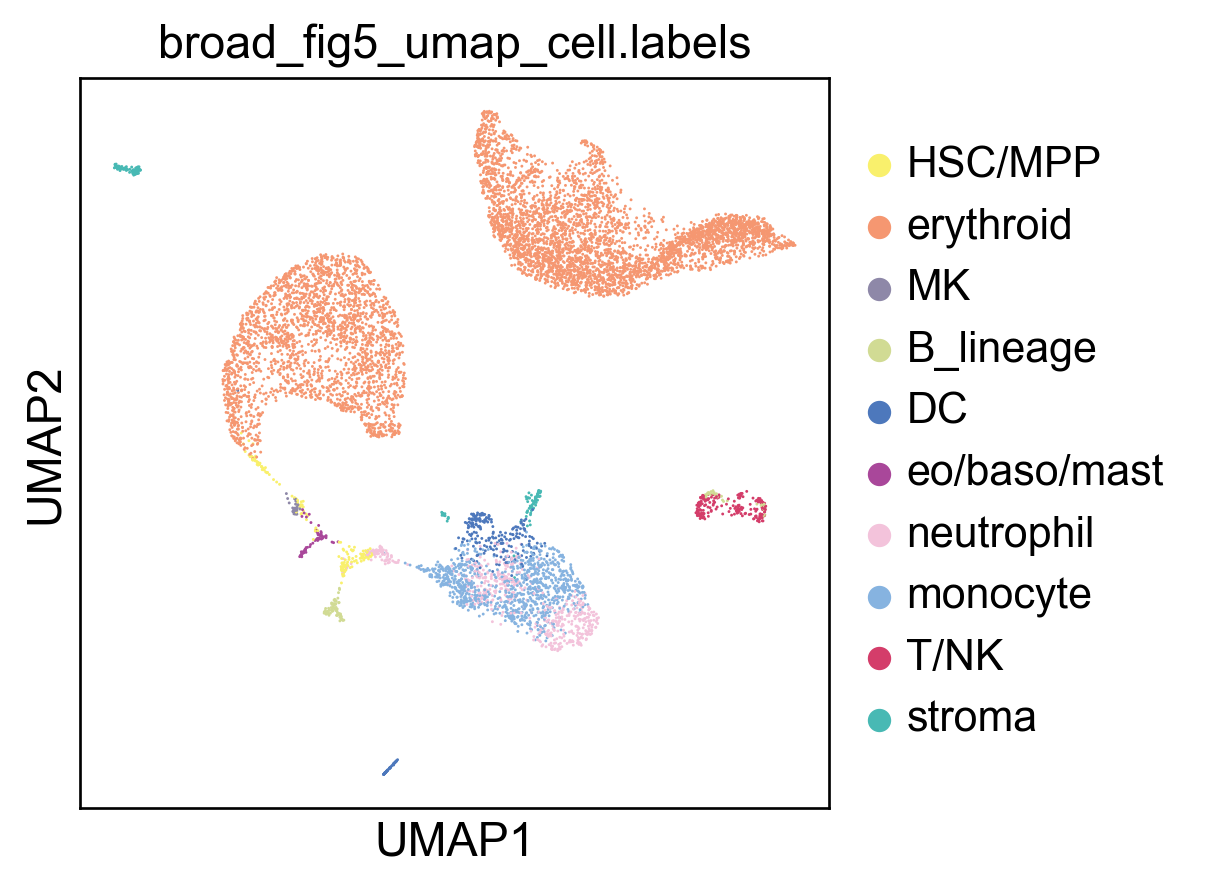

In [23]:
sc.pl.umap(adata, color=['broad_fig5_umap_cell.labels'], size=3)

In [24]:
## UMAP
sc.pl.umap(adata, color='cell.labels', save='_downs_post-harmony_20200714_labels_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='cell.labels', save='_downs_post-harmony_20200714_labels_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

sc.pl.umap(adata, color='broad_fig5_umap_cell.labels', save='_downs_post-harmony_20200714_labels_broad_legoff.pdf', show=False, size=3) 
sc.pl.umap(adata, color='broad_fig5_umap_cell.labels', save='_downs_post-harmony_20200714_labels_broad_legon.pdf', show=False, size=3, legend_loc="on data", legend_fontsize=6)

# Save the data

In [25]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig6a_downs_fbm_scaled_gex_updated_dr_20200714.h5ad")